<a href="https://colab.research.google.com/github/aayushkumar1/EDA/blob/main/yesbank_stock_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT NAME:-**Yes Bank Closing Price Prediction



**PROJECT TYPE:-**Individual


**Team member 1-**Aayush kumar



**PROJECT SUMMARY:-**Yes Bank is an wellknown bank in india which provides wide range of services and solutions right from bank accounts< deposits,cards,cash management,privillege banking, trade finance,Non-Resident India(NRI)banking,institutional banking,merchant acquring,digital banking and agricultural banking solutions.As the data is all about the stock price. The dataset consists of 'Date','Open','High','Low','Close' columns. so, in this project I will be analyzing the patterns of the dataset by performing expolatory data analysis and try to build a model with the help of machine learning for predicting the closing stock price.

The tools for data analysis and model bulding used in this project are the packages from python library such as Numpy and Pandas,Matplotlib,seaborn,Linear Regression,Lasso,Ridge,ElasticNet,Minmaxscalar etc.

**Github Link -**


**Problem Statement:-**The given dataset contains stock price information in the various columns by monthly date. There are 5 columns. Our target variable here is the closing price column which we will try to predict  for future. so first we will perform some exploratory data analysis to the data, try to find out some patterns as well as see the relations between the various columns and the target variable column. Then we will be building a model through which we will be able to predict or provide a decent estimate of the closing price which is our target variables.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOADING THE DATASET
data = pd.read_csv(r'/content/sample_data/yesbank_stockprices.csv')

In [3]:
#1st look of the data
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
#checking the tail of the data
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [5]:
#let's check the shape of the data
data.shape

(185, 5)

In [6]:
#let's check the information of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [7]:
#ckecking the duplicates
data.duplicated().sum()

0

In [8]:
#checking the missing values
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [9]:
data.notnull().sum()

Date     185
Open     185
High     185
Low      185
Close    185
dtype: int64

In [10]:
#let's check the columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
#let's check the statical measures
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [12]:
#checking the unique values for each variable
data.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [13]:
#Data Wrangling Code
dt=data.copy()

In [14]:
dt.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [15]:
#write your code to make your dataset analysis ready
dt['Date']=pd.to_datetime(dt['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [16]:
dt.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


<Figure size 1500x1000 with 0 Axes>

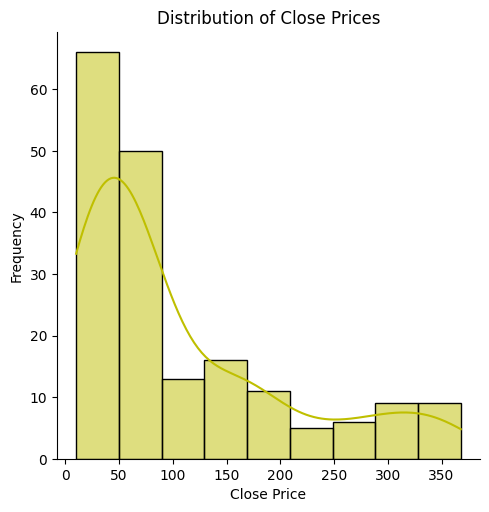

In [17]:
plt.figure(figsize=(15,10))
sns.displot(dt['Close'], color="y", kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

To see the distribution of Closing price in the dataset I have used the displot as with the help of displot i will be able to check the skewness of the data and according to that data will be transformed to handle the skewness.The above chart shows that the 'Close' column data is positively skewed. so, i have to transform this column data to log scale data for handling the skewness.yes the gain insight shows the positive skewed distribution of the 'Close' column that will help me to understand and the methods to be applied to tackle the skewness of  the data.

In [18]:
num_features=dt.describe().columns

In [19]:
num_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

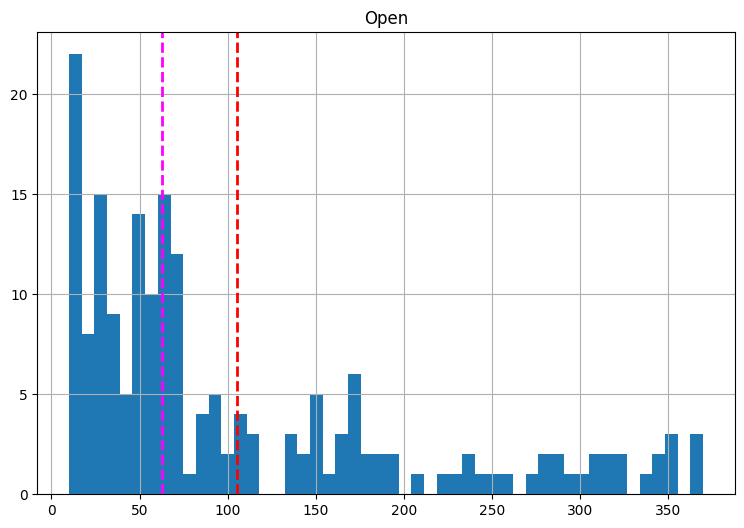

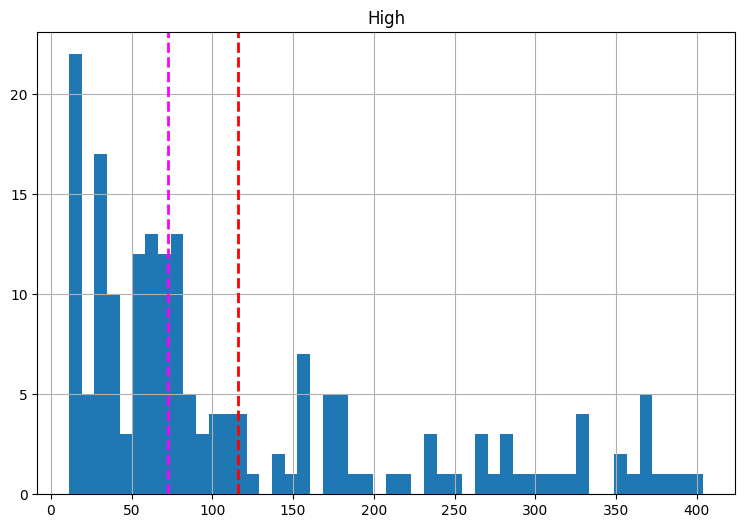

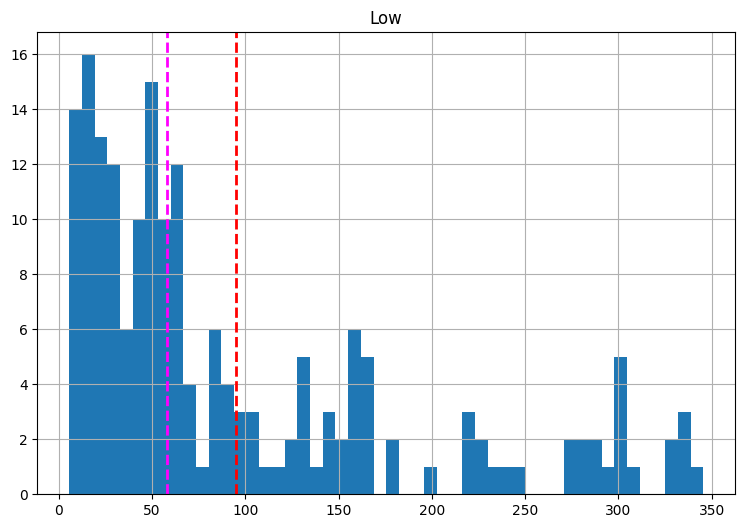

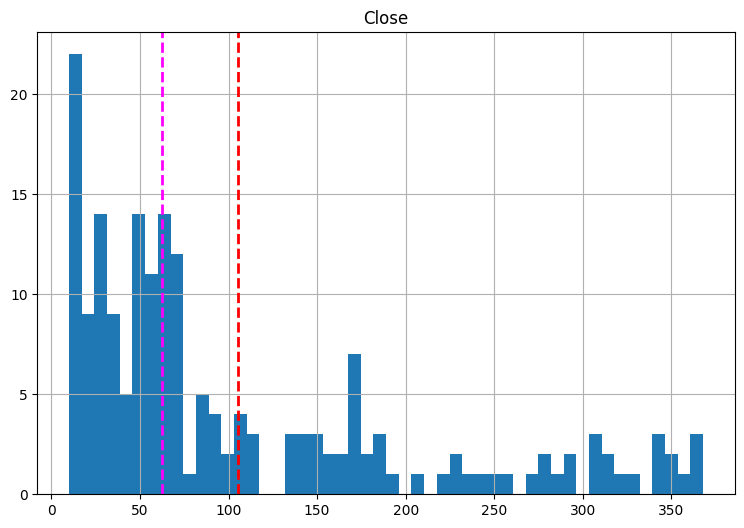

In [20]:
# Visualization number 2
for col in num_features:
  fig = plt.figure(figsize=(9, 6))
  ax= fig.gca()
  feature=dt[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='Red' , linestyle='dashed' , linewidth=2)
  ax.axvline(feature.median(), color='magenta' , linestyle='dashed' , linewidth=2)
  ax.set_title(col)
plt.show()

Histograms with mean and median lines were chosen to visualize the distribution and central tendency of numerical features. Insights include identifying skewness, understanding feature spread, and assessing data distribution patterns. These insights aid in informed decision-making for data preprocessing, risk assessment, and performance optimization in business operations.

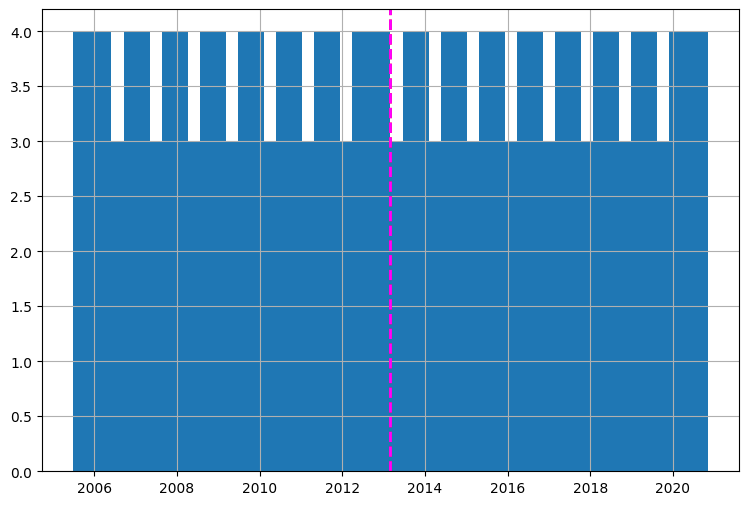

In [21]:
#visualization code
fig = plt.figure(figsize=(9, 6))
ax= fig.gca()
feature=dt['Date']
feature.hist(bins=50, ax=ax)
ax.axvline(feature.mean(), color='Red' , linestyle='dashed' , linewidth=2)
ax.axvline(feature.median(), color='magenta' , linestyle='dashed' , linewidth=2)
plt.show()

The provided visualization code attempts to create a histogram of the 'Date' feature from the 'dt' dataset, overlaid with vertical lines representing the mean and median of the date values. However, visualizing dates as a histogram might not be the most informative representation. Dates are typically treated as categorical or temporal data, rather than numerical data suitable for histograms. Consider using other visualization techniques like line plots or time series plots to better represent temporal data.






In [22]:
ax=px.line(dt,dt['Date'],dt['Close'],title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()

The line plot was chosen for its ability to effectively showcase trends in monthly closing prices over time. Insights from the chart include identifying patterns, seasonality, and overall price movements. These insights can inform strategic decisions, optimize pricing strategies, and improve financial performance, ultimately leading to positive business outcomes.


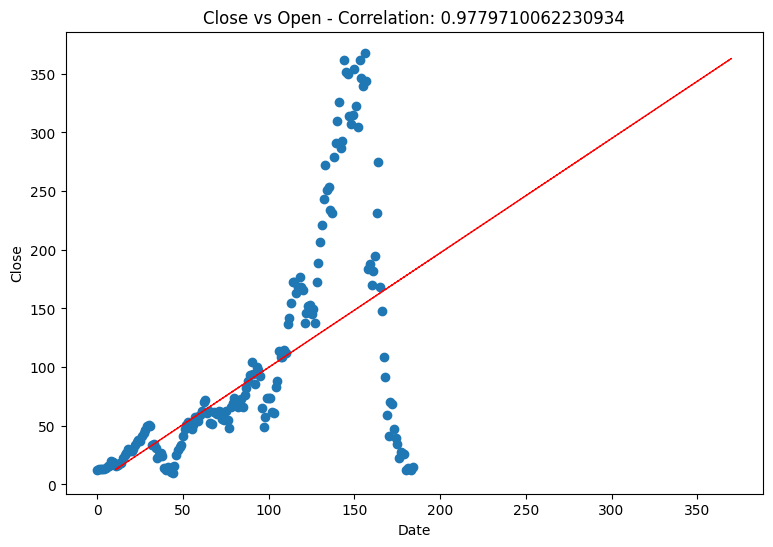

In [23]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
correlation = dt['Open'].corr(dt['Close'])
plt.scatter(x=dt.index, y=dt['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
ax.set_title('Close vs Open - Correlation: ' + str(correlation))
z = np.polyfit(dt['Open'], dt['Close'], 1)
y_hat = np.poly1d(z)(dt['Open'])
plt.plot(dt['Open'], y_hat, "r--", lw=1)
plt.show()


The provided visualization code creates a scatter plot depicting the relationship between the 'Open' and 'Close' prices from the 'dt' dataset. Additionally, it includes a linear regression line to showcase the trend between these two variables. The correlation coefficient between 'Open' and 'Close' prices is calculated and displayed in the title of the plot. However, it's worth noting that using a scatter plot to visualize the relationship between 'Date' and 'Close' prices might not be the most appropriate choice. Typically, scatter plots are used for visualizing relationships between two continuous variables. Since 'Date' is a temporal variable, other visualization techniques such as line plots or time series plots may be more suitable for depicting the relationship between 'Date' and 'Close' prices.

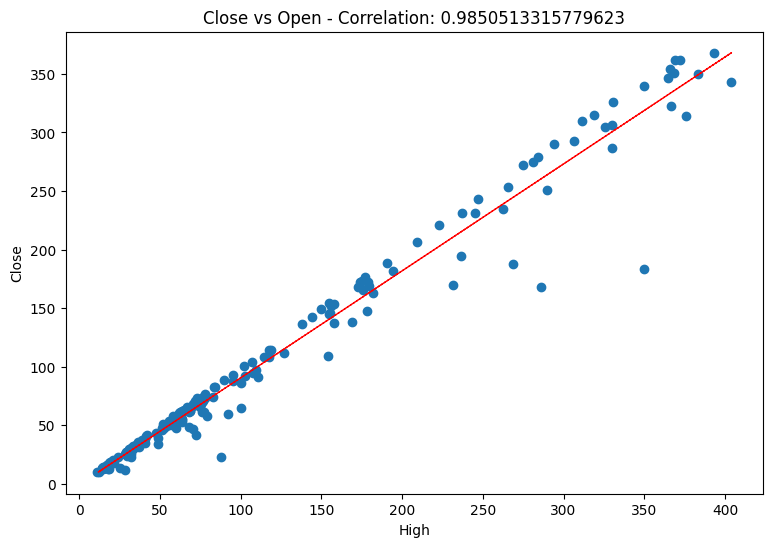

In [24]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature=dt['High']
label=dt['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs Open - Correlation: ' + str(correlation))
z = np.polyfit(dt['High'], dt['Close'], 1)
y_hat = np.poly1d(z)(dt['High'])
plt.plot(dt['High'], y_hat, "r--", lw=1)
plt.show()


This code successfully generates a scatter plot showing the relationship between 'High' and 'Close' prices. The linear regression line provides a visual representation of the correlation between these two variables. Ensure that 'High' and 'Close' contain numerical data for correlation calculation and fitting the regression line. This visualization aids in understanding the association between the highest and closing prices, which is crucial for market analysis and trading strategies.






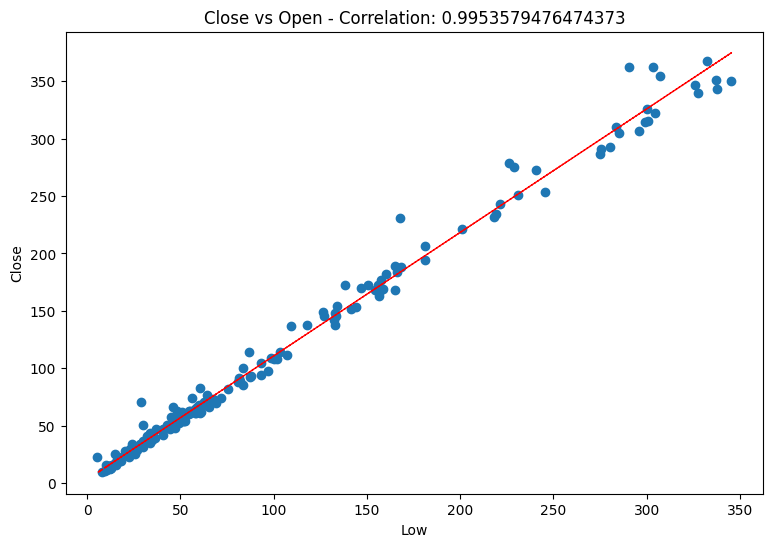

In [25]:
#visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature=dt['Low']
label=dt['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs Open - Correlation: ' + str(correlation))
z = np.polyfit(dt['Low'], dt['Close'], 1)
y_hat = np.poly1d(z)(dt['Low'])
plt.plot(dt['Low'], y_hat, "r--", lw=1)
plt.show()

The chosen scatter plot with a regression line illustrates the relationship between 'Low' and 'Close' prices, providing insights into how low prices impact closing prices. This visualization aids in understanding the correlation between these variables, which is crucial for market analysis and trading strategies. Utilizing these insights can inform decision-making processes, enhance risk management strategies, and potentially lead to more profitable outcomes in trading activities.

<Axes: >

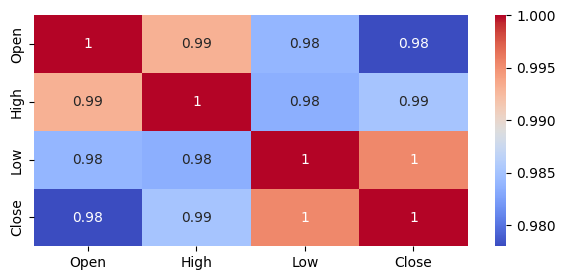

In [26]:
#correlation heatmap visualization code
plt.figure(figsize=(7,3))
sns.heatmap(dt.corr(),annot=True,cmap='coolwarm')


The provided code generates a correlation heatmap for the variables in the 'dt' dataset. This heatmap visualizes the correlation coefficients between different pairs of variables, with annotations displaying the correlation values. The 'coolwarm' colormap is used to represent the strength and direction of correlations. This visualization technique allows for quick identification of relationships between variables, aiding in feature selection, identifying multicollinearity, and guiding further analysis or modeling decisions.






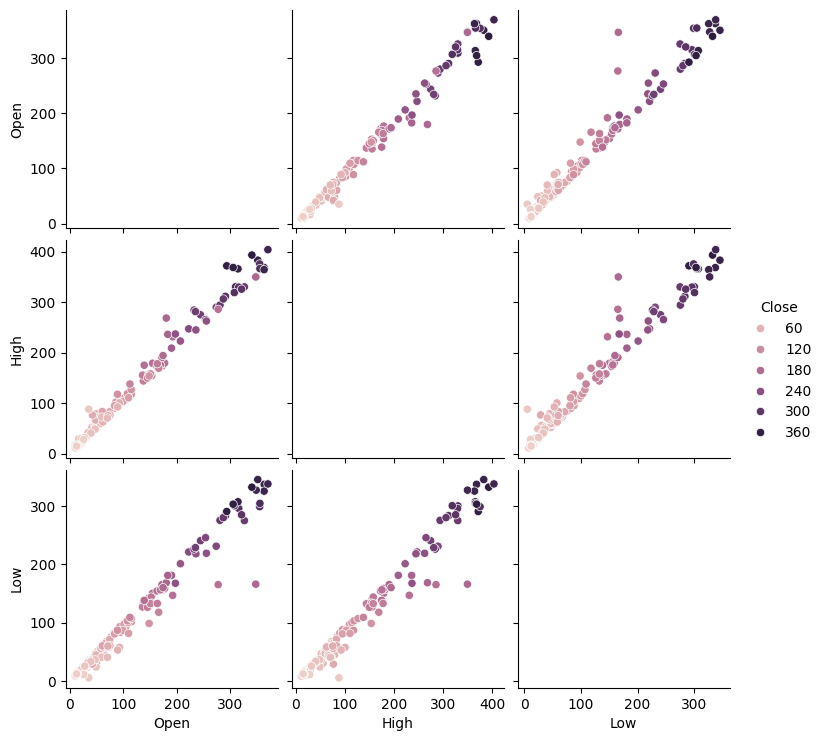

In [27]:
#pair plot visualization code
sns.pairplot(dt,hue="Close")

The sns.pairplot() function generates a grid of pairwise plots for each pair of variables in the 'dt' dataset, with the variable 'Close' used for coloring the data points. This visualization is useful for exploring relationships between multiple variables simultaneously and can provide insights into patterns, correlations, and distributions within the dataset. By incorporating the 'Close' variable as the hue, this pairplot can help identify how other variables vary with respect to changes in the closing price, aiding in understanding potential dependencies and interactions within the data.






In [28]:
#Handling Outliers & Outlier treatments
fig=px.box(dt['Open'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

The provided code utilizes Plotly Express to generate a box plot specifically for the 'Open' prices in the 'dt' dataset. This visualization aids in identifying outliers within the 'Open' price distribution. Outliers, which are data points that significantly differ from the majority of the data, are displayed as individual points beyond the whiskers of the box plot. By visualizing outliers, one can better understand the spread and distribution of the 'Open' prices, which is crucial for outlier treatment strategies such as trimming, winsorizing, or excluding extreme values from further analysis.

In [29]:
#Transforming the above data to log10 scale
fig=px.box(np.log10(dt['Open']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [30]:
fig=px.box(dt['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [31]:
#Transforming the above data to log10 scale
fig=px.box(np.log10(dt['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [32]:
fig=px.box(dt['Low'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [33]:
fig=px.box(np.log10(dt['Low']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

<Figure size 1500x1000 with 0 Axes>

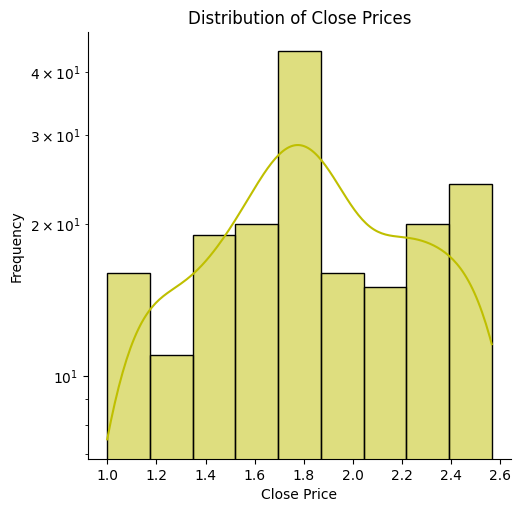

In [34]:
plt.figure(figsize=(15, 10))
sns.displot(np.log10(dt['Close']),color="y", kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.yscale('log')  # Apply log10 scale to y-axis
plt.show()


In [35]:
dt.set_index('Date' ,inplace=True)

In [36]:
#Generating a new feature to tackle the high multicolinearity
dt['average'] = dt[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [37]:
dt.head()

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37


In [38]:
dependant_variable='Close'


In [39]:
Independent_variable=list(set(dt.columns.tolist())-{dependant_variable})

In [40]:
x=np.log10(dt[Independent_variable]).values

In [41]:
y=np.log10(dt[dependant_variable]).values

In [42]:
#split the data to train and test. choose splitting  rato is 80/20
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
#scaling your data
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [44]:
#LinearRegression Implementation
regressor = LinearRegression()

#fit the Algorithm
regressor.fit(x_train,y_train)

LinearRegression()

In [45]:
regressor.intercept_

0.9797572199457668

In [46]:
regressor.coef_

array([-1.46550815,  0.90459122,  1.8295131 ,  0.31613169])

In [47]:
y_pred_train=regressor.predict(x_train)
#predicting the test results
y_pred=regressor.predict(x_test)

In [48]:
y_train

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [49]:
#predicted closing price on the test data set
y_pred

array([1.4923911 , 2.14805936, 1.66188379, 2.14969445, 1.82574095,
       1.50808261, 2.36594461, 1.2267379 , 1.14805807, 2.34435985,
       2.47726939, 1.94425469, 2.18459158, 1.76981107, 2.53179597,
       2.42427508, 1.86780302, 1.44681118, 2.42593087, 1.70693503,
       0.96961156, 2.07433412, 2.17187189, 1.77411331, 2.33861575,
       1.69564443, 2.40140144, 1.13603302, 2.03325749, 1.72217345,
       2.57000081, 2.54424413, 1.86850165, 2.22427412, 1.59443763,
       1.6805872 , 2.41726416])

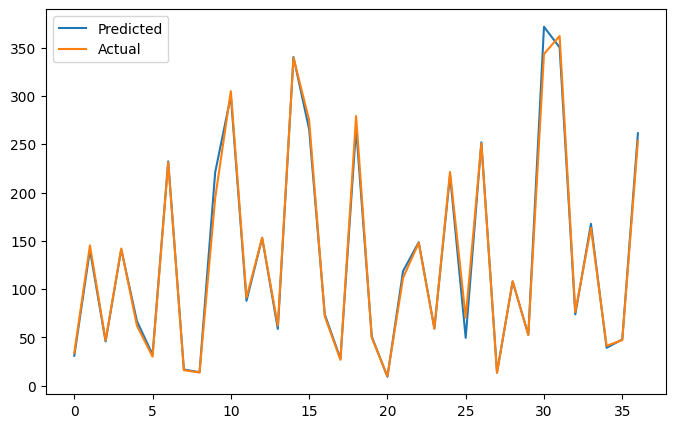

In [50]:
#now we will visualize the comparison between actual values and predicted values of the target variable
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(['Predicted','Actual'])
plt.show()

In [51]:
#check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred),labels={'x':'Actual_value','y':'prediction'})
fig.add_shape(type='line',line=dict(dash='dash'),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

In [52]:
#visualizing evaluation metric score chart
Lr_MSE=mean_squared_error(10**(y_test),10**(y_pred))
Lr_MSE

69.92976518274922

In [53]:
mse_train=mean_squared_error(10**(y_train),10**(y_pred_train))

In [54]:
mse_train

44.40573158904328

In [55]:
#Train performance
rmse_train=np.sqrt(mse_train)

In [56]:
rmse_train

6.663762569978261

In [57]:
#Test performance
Lr_RMSE=np.sqrt(Lr_MSE)
Lr_RMSE

8.362401878811447

In [58]:
Lr_MAE=mean_absolute_error(10**(y_test),10**(y_pred))

In [59]:
Lr_MAE

4.746993623525008

In [60]:
mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))

0.04709625503648754

In [61]:
Lr_MAPE=mean_absolute_percentage_error(10**(y_test),10**(y_pred))
Lr_MAPE

0.041509723767066284

In [62]:
r2_score(y_train,y_pred_train)

0.9951721981228238

In [63]:
#Test performance
Lr_R2_score=r2_score(y_test,y_pred)
Lr_R2_score

0.9946673148333343

In [64]:
matrics_score=pd.DataFrame({'mean squared error':[Lr_MSE],'root mean squared error':[Lr_MAE],'mean absolute percentage':[Lr_RMSE]})

In [65]:
matrics_score

,mean squared error,root mean squared error,mean absolute percentage
0,69.929765,4.746994,8.362402


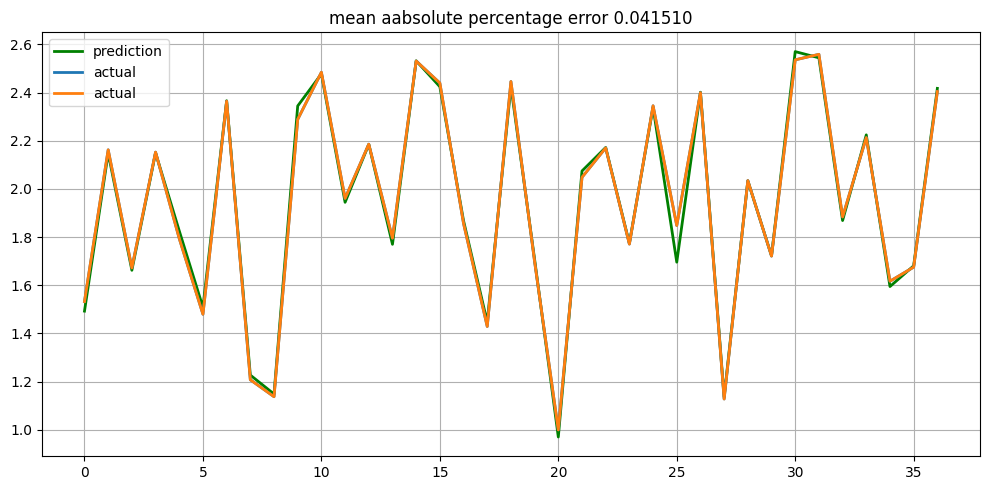

In [66]:
#function to plot model performance
def plotmodelresults(model, x_train=x_train, x_test=x_test,plot_interval=False):
  #plots modelled vs fact values

  prediction=model.predict(x_test)
  plt.figure(figsize=(10,5))
  plt.plot(prediction,"g",label="prediction",linewidth=2.0)
  plt.plot(y_test,label='actual',linewidth=2.0)
  plt.plot(y_test,label="actual",linewidth=2.0)
  plt.title("mean aabsolute percentage error {0:2f}".format(Lr_MAPE))
  plt.legend(loc="best")
  plt.tight_layout()
  plt.tight_layout()
  plt.grid(True);

plotmodelresults(regressor, plot_interval=False)


In [67]:
#Implementing the ridge regression
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [68]:
print("the best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, "the negative mean squared error is: ",ridge_regressor.best_score_)

the best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01} the negative mean squared error is:  -0.0011773450928997612


In [69]:
y_pred_ridge=ridge_regressor.predict(x_test)

In [70]:
y_pred_ridge

array([1.49497405, 2.14885571, 1.67959522, 2.14515702, 1.82041642,
       1.5033444 , 2.36409877, 1.21975906, 1.14268177, 2.34060261,
       2.4776548 , 1.95289768, 2.18105758, 1.76853582, 2.52868016,
       2.42119101, 1.86349297, 1.44148176, 2.42297031, 1.70850826,
       0.97356231, 2.07243188, 2.17737697, 1.76868982, 2.33427424,
       1.69801724, 2.40504124, 1.12999633, 2.03120817, 1.72809578,
       2.56998041, 2.54062498, 1.86455564, 2.22417362, 1.59142813,
       1.67901578, 2.41282407])

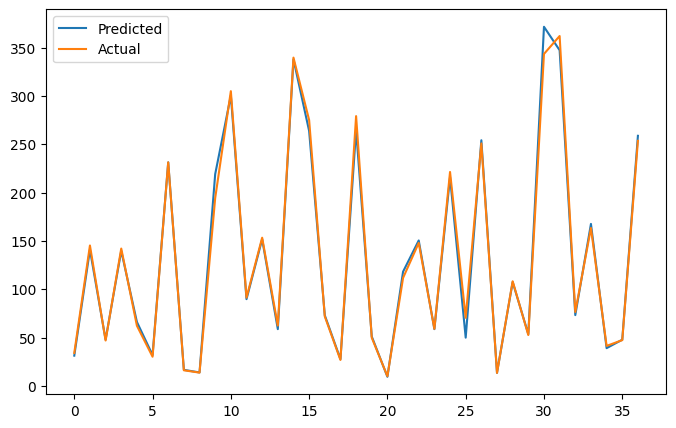

In [71]:
#now let's visualize the comparison between actual and predicted values of the target variable
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [72]:
#Explain the ML Model used and it's performance using Evaluation metric score chart.
R_MSE=mean_squared_error(10**(y_test),10**(y_pred_ridge))
print("MSE :",R_MSE)

MSE : 70.90780796564454


In [73]:
R_RMSE = np.sqrt(R_MSE)
print("RMSE :",R_RMSE)

RMSE : 8.420677405389933


In [74]:
R_r2=r2_score(10**(y_test),10**(y_pred_ridge))
R_r2

0.9937003889249277

In [75]:
R_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
R_MAE

4.931169409078708

In [76]:
R_MAPE=mean_absolute_percentage_error(10**(y_test),10**(y_pred_ridge))
R_MAPE

0.039993489847849346

In [77]:
#visualizing evaluation metric score chart
matrics_score_ridge=pd.DataFrame({'mean squared error':[R_MSE],'root mean squared error':[R_RMSE],'mean absolute error':[R_MAE],'mean_absolute_percentage_error':[R_MAPE]})

In [78]:
matrics_score_ridge

,mean squared error,root mean squared error,mean absolute error,mean_absolute_percentage_error
0,70.907808,8.420677,4.931169,0.039993


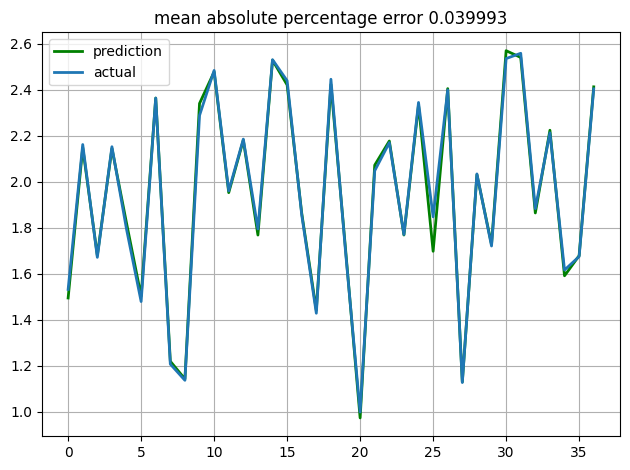

In [79]:
#function to plot model performance
def plotmodelresults(model,x_train=x_train,x_test=x_test,plot_intervals=False):
  #plots modelled vs fact values
  prediction=model.predict(x_test)
  plt.plot(prediction,"g",label="prediction",linewidth=2.0)
  plt.plot(y_test, label='actual' ,linewidth=2.0)
  plt.title("mean absolute percentage error {0:2f}".format(R_MAPE))
  plt.legend(loc="best")
  plt.tight_layout()
  plt.grid(True)

plotmodelresults(ridge_regressor, plot_intervals=False)


In [80]:
#Implementing LASSO Regression with cross validation
lasso=Lasso(alpha=0.1 , max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [81]:
#visualizing evaluation metric score chart
lasso.score(x_train,y_train)

0.24239155193667772

In [82]:
y_pred_1=lasso.predict(x_test)


In [83]:
MSE = mean_squared_error(10**(y_test),10**(y_pred_1))
print("MSE :",MSE)
MAE = mean_absolute_error(10**(y_test),10**(y_pred_1))
print("MAE:",MAE)
RMSE=np.sqrt(MSE)
print("RMSE: ",RMSE)
MAPE=mean_absolute_percentage_error(10**(y_test),10**(y_pred_1))
print("MAPE:",MAPE)
r2=r2_score(10**(y_test),10**(y_pred_1))
print("R2 :",r2)

MSE : 14034.988948250462
MAE: 82.57480570251505
RMSE:  118.46935868928497
MAPE: 0.7547254629560559
R2 : -0.24690036758368716


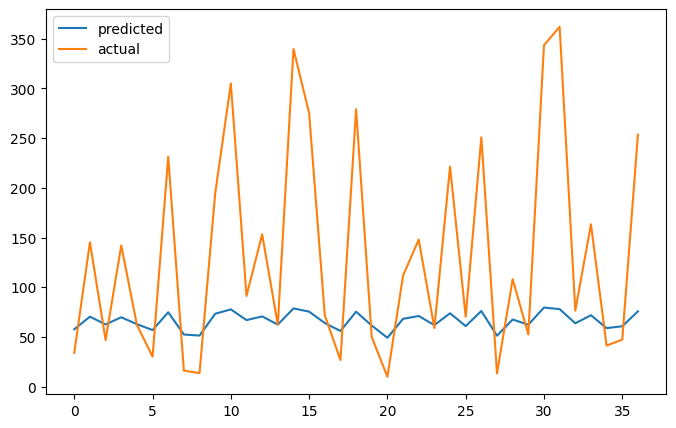

In [84]:
#Function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_1))
plt.plot(10**(np.array(y_test)))
plt.legend(["predicted","actual"])
plt.show()

In [85]:
#Hypertuning and Cross validation
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [86]:
print("the best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, "the negative mean squared error is: ",lasso_regressor.best_score_)

the best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05} the negative mean squared error is:  -0.0012806987103431721


In [87]:
y_pred_lasso=lasso_regressor.predict(x_test)

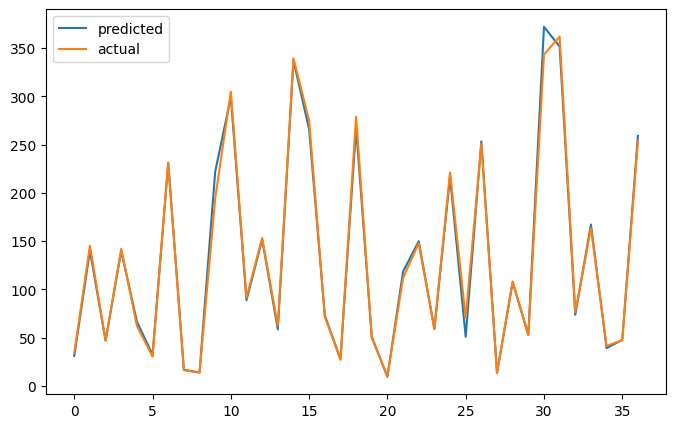

In [88]:
#Checking evaluation metrix number
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["predicted","actual"])
plt.show()


In [89]:
#Checking evaluation metrix number
L_MSE = mean_squared_error(10**(y_test),10**(y_pred_lasso))
print("MSE :",L_MSE)
L_MAE = mean_absolute_error(10**(y_test),10**(y_pred_lasso))
print("MAE:",L_MAE)
L_RMSE=np.sqrt(MSE)
print("RMSE: ",L_RMSE)
L_MAPE=mean_absolute_percentage_error(10**(y_test),10**(y_pred_lasso))
print("MAPE:",L_MAPE)
L_r2=r2_score(10**(y_test),10**(y_pred_lasso))
print("R2 :",L_r2)

MSE : 69.35545195969515
MAE: 4.755656454795359
RMSE:  118.46935868928497
MAPE: 0.03926347558240434
R2 : 0.9938383037662986


In [90]:

matrics_score_lasso=pd.DataFrame({'mean squared error':[L_MSE],'root mean squared error':[L_RMSE],'mean absolute error':[L_MAE],'mean_absolute_percentage_error':[L_MAPE]})

In [91]:
matrics_score_lasso

,mean squared error,root mean squared error,mean absolute error,mean_absolute_percentage_error
0,69.355452,118.469359,4.755656,0.039263


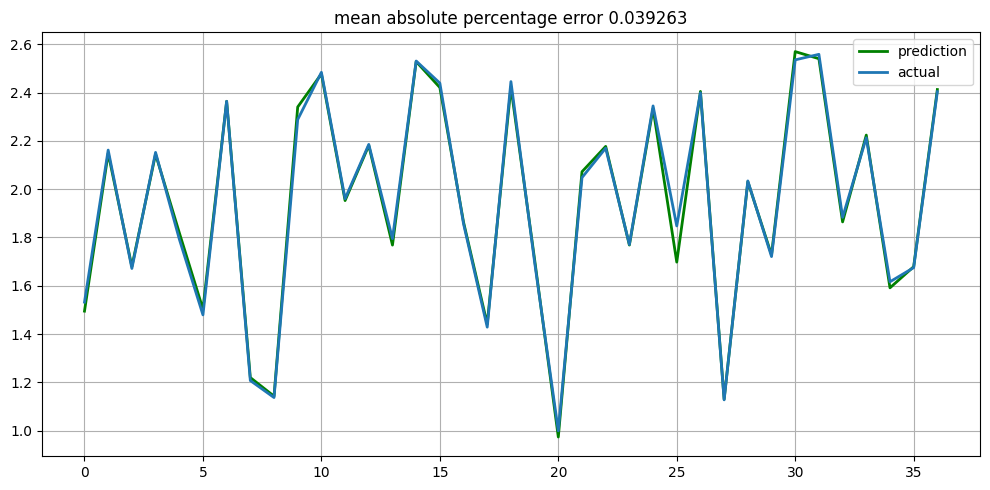

In [92]:
#checking the performance of the model
def plotmodelresults(model,x_train=x_train,x_test=x_test,plot_intervals=False):
  #plots modelled vs fact values
  prediction=model.predict(x_test)
  plt.figure(figsize=(10,5))
  plt.plot(prediction,"g",label="prediction",linewidth=2.0)
  plt.plot(y_test, label='actual' ,linewidth=2.0)
  plt.title("mean absolute percentage error {0:2f}".format(L_MAPE))
  plt.legend(loc="best")
  plt.tight_layout()
  plt.grid(True)

plotmodelresults(ridge_regressor, plot_intervals=False)

In [93]:
#ElasticNet Regression with cross validation
elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [94]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [95]:
elasticnet.score(x_train,y_train)

0.6978243547570879

In [96]:
y_pred_en=elasticnet.predict(x_test)

In [97]:
#Checking evaluation metrix number
MSE = mean_squared_error(10**(y_test),10**(y_pred_en))
print("MSE :",MSE)
MAE = mean_absolute_error(10**(y_test),10**(y_pred_en))
print("MAE:",MAE)
RMSE=np.sqrt(MSE)
print("RMSE: ",RMSE)
MAPE=mean_absolute_percentage_error(10**(y_test),10**(y_pred_en))
print("MAPE:",MAPE)
r2=r2_score(10**(y_test),10**(y_pred_en))
print("R2 :",r2)

MSE : 8197.99742750758
MAE: 60.57723135340351
RMSE:  90.54279334937475
MAPE: 0.44832237019723226
R2 : 0.27167124651825525


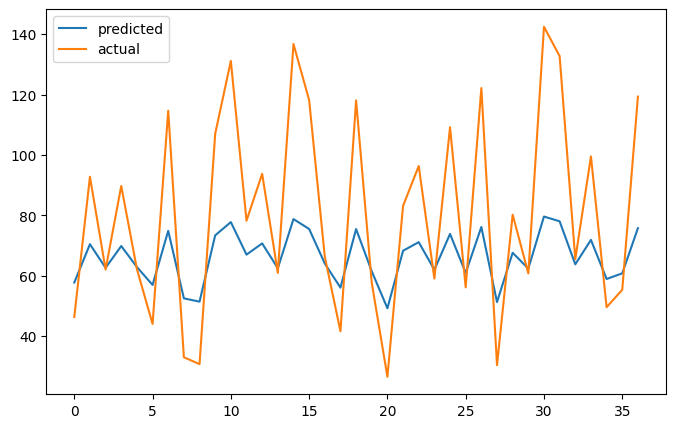

In [98]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_1))
plt.plot(10**(np.array(y_pred_en)))
plt.legend(["predicted","actual"])
plt.show()

In [99]:
#Hypertuning and Cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50, 55, 60, 100],
              'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}  # Corrected parameter name
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 50, 55, 60,
                                   100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [100]:
y_pred_elastic=elastic_regressor.predict(x_test)

In [101]:
print("the best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, "the negative mean squared error is: ",elastic_regressor.best_score_)

the best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3} the negative mean squared error is:  -0.0011136684782042457


In [102]:
#Checking evaluation metrix number
E_MSE = mean_squared_error(10**(y_test),10**(y_pred_elastic))
print("MSE :",E_MSE)
E_MAE = mean_absolute_error(10**(y_test),10**(y_pred_elastic))
print("MAE:",E_MAE)
E_RMSE=np.sqrt(MSE)
print("RMSE: ",E_RMSE)
E_MAPE=mean_absolute_percentage_error(10**(y_test),10**(y_pred_elastic))
print("MAPE:",E_MAPE)
E_r2=r2_score(10**(y_test),10**(y_pred_elastic))
print("R2 :",E_r2)

MSE : 73.06971607638074
MAE: 5.048162508616102
RMSE:  90.54279334937475
MAPE: 0.04050900954103758
R2 : 0.9935083200869758


In [103]:

matrics_score_elastic=pd.DataFrame({'mean squared error':[E_MSE],'root mean squared error':[E_RMSE],'mean absolute error':[E_MAE],'mean_absolute_percentage_error':[E_MAPE]})

In [104]:
matrics_score_elastic

,mean squared error,root mean squared error,mean absolute error,mean_absolute_percentage_error
0,73.069716,90.542793,5.048163,0.040509


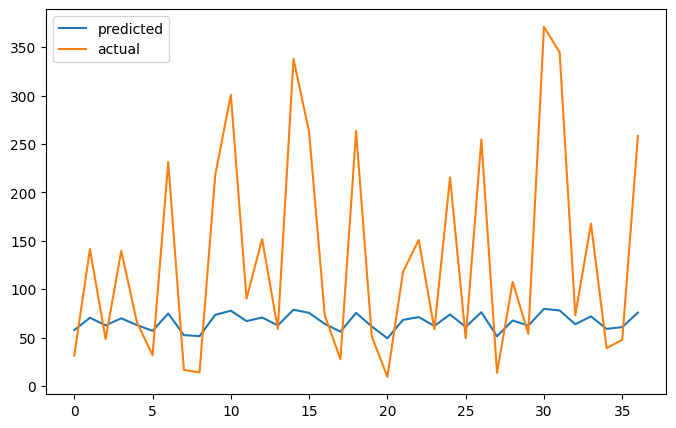

In [105]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_1))
plt.plot(10**(np.array(y_pred_elastic)))
plt.legend(["predicted","actual"])
plt.show()

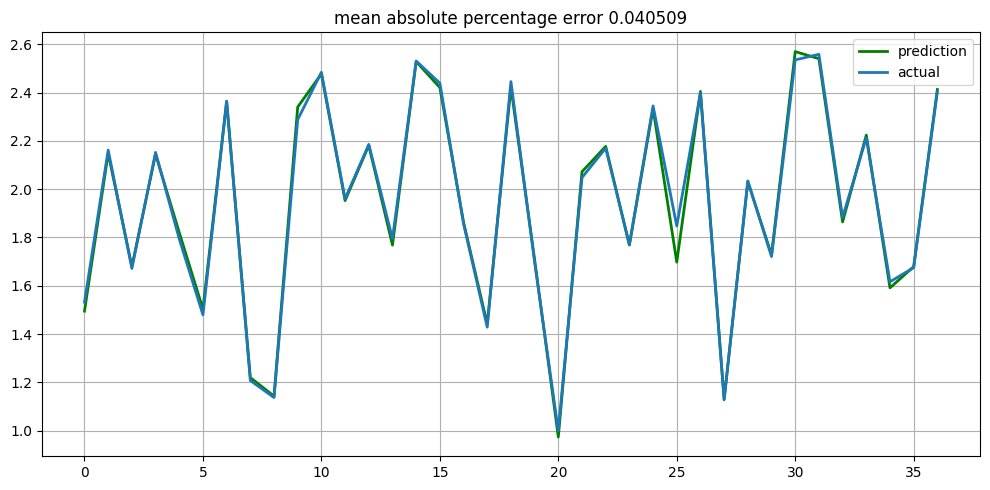

In [106]:
#checking the performance of the model
def plotmodelresults(model,x_train=x_train,x_test=x_test,plot_intervals=False):
  #plots modelled vs fact values
  prediction=model.predict(x_test)
  plt.figure(figsize=(10,5))
  plt.plot(prediction,"g",label="prediction",linewidth=2.0)
  plt.plot(y_test, label='actual' ,linewidth=2.0)
  plt.title("mean absolute percentage error {0:2f}".format(E_MAPE))
  plt.legend(loc="best")
  plt.tight_layout()
  plt.grid(True)

plotmodelresults(ridge_regressor, plot_intervals=False)

**Which hyperparameter optimization technique have you used and why?**
Here for all the models i have used grid search cross validation technique since i have already the hyper parameter numbers and also the search space that is the data set is very small. so as per my understanding grid search cv would be the first choice to tune the hyper parameter.

**Have you seen improvement? Note down the improvement with updates Evaluation metric Score Chart?**
Yes after using grid search cv for each model the performance is improved. for example for lasso regression one of the evaluation matrix the mean absolute percentage error before cross validation is MAPE:0.7547 approx but after using cross validation the same mevaluation matrix for the test data became Mape:0.0409 appprox.Therefore, it can be established that after using crossvalidation the performance was improved.that can be visualized also in the above plots.

**Which Evaluation metrics did you consider for a positive business impact and why?**
Since this problem is related to regression so i would choose the root mean square error evaluation metrics for positive business impact.The root mean square error not only measures the difference between the actual and predicted values it also indicates the effect of large errors.

**which ML model did you choose from the above created models as your final prediction model and why?**

From all the above models for lasso and elasticnet regressions the evaluation matrices for test data set are almost close to each other. so as per my understanding we can use elasticnet regressor for now.However it will be very early to pick a model at this point of time since the dataset is very small as we need more data so that the algorithms get more training data to learn more and improve their accuracy.

**CONCLUSION:-**
. The data set does not have any null values/missing values as well as duplicate values which made the analysis easy and smooth.
.I started with univariate analysis in which it can be seen that all the variables were positively skewed.
. In the section of bivariate analysis it can be clearly seen that all the variables are having linear relationship between target variables.
. While analysing the close price with date it can be seen that there was huge fall in the stock prices after 2018.
.In the correlation heatmap chart it can be clearly seen that all the variables are highly correlated to each other which is a problem for linear regression.
.In the box plot section it can be seen that the independent variables are having some outliers.
.Also the date column was formated to year-month-date format.
.To tackle the outliers,skewness and multicolinearity problem the data was transformed to log10 scale and a new feature as average which is the mean of the prices for each row was generated.
. At last i have tried to implement 4 models in order to predict the closing stock prices and finally found that the lasso and elasticsnet regression are the best performing model since it has better r2 score value as well as other evaluation matrics values.